In [1]:
%matplotlib inline
import matplotlib.style as style

import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm import tqdm

import scqubits as scq
import qutip as qt

from PulseSequence import PulseSequence
from QSwitch import QSwitch

style.use('default')
plt.rcParams['figure.figsize'] = [9.7, 6]
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
scq.settings.PROGRESSBAR_DISABLED = True

In [2]:
hbar = 1
h = hbar*2*np.pi
qe = 1

# Unit conversions
MHz = 10.0**(-3)
GHz = 1.0
kHz = 10.0**(-6)
us = 10.0**3
ns = 1.0

In [95]:
# q_in, q_switch, q_out1, q_out2
# EJs = [21, 20, 22, 21.5]
# ECs = [0.25, 0.35, 0.35, 0.28]
# gs = [0.1, 0.1, 0.1] # g12, g23, g24
EJs = [19, 18, 23, 24]
ECs = [0.25, 0.4, 0.28, 0.35]
gs = [0.040, 0.020, 0.045] # g12, g23, g24
cutoffs = [4, 5, 4, 4]
isCavity = [False, False, False, False]

qram = QSwitch(
    EJs=EJs,
    ECs=ECs,
    gs=gs,
    cutoffs=cutoffs,
    isCavity=isCavity,
)

qubit_freqs = qram.qubit_freqs
alphas = qram.alphas
print(qubit_freqs[0], qubit_freqs[1], qubit_freqs[2], qubit_freqs[3])
print(alphas[0], alphas[1], alphas[2], alphas[3])

5.903001952477268 7.164753887314777 6.885510681734878 7.830621919946921
-0.27828128251087847 -0.46447196897809384 -0.31017075005341965 -0.39226865879855666


In [96]:
# MAKE SURE DRESSED STATES ARE MAPPED CORRECTLY, AT LEAST FOR <= n EXCITATIONS

qram.check_state_mapping(n=3)

100%|██████████| 320/320 [00:53<00:00,  6.02it/s]

Good enough for dressed states mappings.


True

In [119]:
seq = PulseSequence(start_time=0)
# wd1 = qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.17)
# wd2 = qram.add_sequential_pi_pulse(seq, 'eegg', 'eggg', amp=0.01)
# wd3 = qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggeg', amp=0.08)
# wd4 = qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', wd=wd1, amp=0.17)
# wd5 = qram.add_sequential_pi_pulse(seq, 'ggeg', 'geeg', amp=0.01) # should be same as wd2
# wd6 = qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggge', amp=0.01)
# wd7 = qram.add_sequential_pi_pulse(seq, 'ggge', 'gege', amp=0.01) # should be same as wd2 and should also drive geeg -> ggeg


print('wd1')
wd1 = qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.10, drive_qubit=1)
print('wd2')
wd2 = qram.add_sequential_pi_pulse(seq, 'eegg', 'eggg', amp=0.05, drive_qubit=1)
print('wd3')
wd3 = qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggeg', amp=0.05, drive_qubit=1)
print('wd4')
wd4 = qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.10, drive_qubit=1, wd=wd1)
print('wd5')
wd5 = qram.add_sequential_pi_pulse(seq, 'ggeg', 'geeg', amp=0.02, drive_qubit=1)
print('wd6')
wd6 = qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggge', amp=0.05, drive_qubit=1)
print('wd7')
wd7 = qram.add_sequential_pi_pulse(seq, 'ggge', 'gege', amp=0.05, drive_qubit=1)

# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.12)
# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggeg', amp=0.04)
# qram.add_sequential_pi_pulse(seq, 'eegg', 'eggg', amp=0.07)
# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.12) # repeat of pulse 0
# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggge', amp=0.18)

# seq.wait(50)

# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggge', amp=0.18)
# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.12) # repeat of pulse 0
# qram.add_sequential_pi_pulse(seq, 'eegg', 'eggg', amp=0.07)
# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggeg', amp=0.04)
# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.12)


# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.07)
# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggeg', amp=0.03)
# qram.add_sequential_pi_pulse(seq, 'eegg', 'eggg', amp=0.04)
# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.07)
# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggge', amp=0.06)

# seq.wait(50)

# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggge', amp=0.06)
# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.07)
# qram.add_sequential_pi_pulse(seq, 'eegg', 'eggg', amp=0.04)
# qram.add_sequential_pi_pulse(seq, 'gfgg', 'ggeg', amp=0.03)
# qram.add_sequential_pi_pulse(seq, 'eggg', 'gfgg', amp=0.07)

wd1
	new overlap 0.8389104027145917 wd 50.01118893914545
	new overlap 0.8389104027145917 wd 50.01118893914545
	new overlap 0.9900007057529872 wd 49.991188939145445
updated wd from 7.959527929567719 to 7.9563448307058815
wd2
	new overlap 0.9955968135849714 wd 45.00335639210257
updated wd from 7.162506625529368 to 7.162506625529368
wd3
	new overlap 0.9788492638024966 wd 43.83890654427044
	new overlap 0.9788492638024966 wd 43.83890654427044
	new overlap 0.9807048671931857 wd 43.84890654427044
	new overlap 0.9810093886311397 wd 43.84690654427044
updated wd from 6.9771786762642805 to 6.978451915809015
wd4
wd5
	new overlap 0.9993166005465555 wd 45.05031945751449
updated wd from 7.169981029532424 to 7.169981029532424
wd6
	new overlap 0.660807417505634 wd 37.872569670186365
	new overlap 0.7236921134577426 wd 37.82256967018637
	new overlap 0.9781106880013417 wd 37.84256967018637
	new overlap 0.9781106880013415 wd 37.84256967018637
updated wd from 6.027606670602353 to 6.022832022309597
wd7
	new 

[7.9563448307058815, 7.162506625529368, 6.978451915809015, 7.9563448307058815, 7.169981029532424, 6.022832022309597, 7.153734701682057] (GHz)
[189.84428648636265, 10.053706926213628, 40.6009291593996, 189.84428648636265, 25.832831308488867, 264.18118528023206, 10.267759024658956] (ns)
total pulse length 730.6249846717185 ns


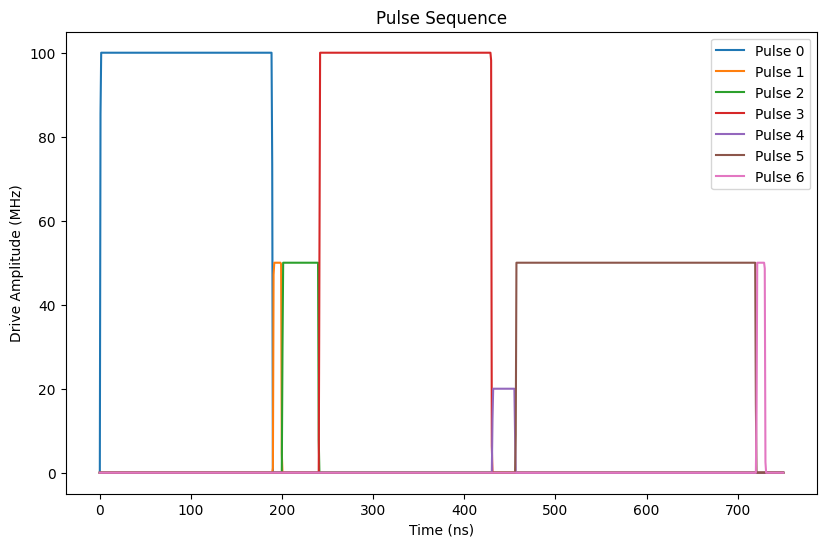

In [121]:
# times = np.linspace(0, 550, 1000)
times = np.linspace(0, 750, 1000)
# times = np.linspace(0, 300, 700)
# times = np.linspace(0, 50, 100)

envelope_seq = seq.get_envelope_seq()
print(seq.get_pulse_freqs(), '(GHz)')
print(seq.get_pulse_lengths(), '(ns)')
print('total pulse length', sum(seq.get_pulse_lengths()), 'ns')
for i in range(len(envelope_seq)):
    plt.plot(times, [envelope_seq[i](t)/MHz for t in times], label=f'Pulse {i}')
plt.xlabel('Time (ns)')
plt.ylabel('Drive Amplitude (MHz)')
plt.title('Pulse Sequence')
plt.legend()
plt.show()

In [122]:
# incl_dissipation = True
incl_dissipation = False

T1 = 60e3 # ns
T2 = 30e3 # ?

# T1 = 10e3

c_ops = [
    np.sqrt(1/T1)*qram.a,
    np.sqrt(1/T1)*qram.b,
    np.sqrt(1/T1)*qram.c,
    np.sqrt(1/T1)*qram.d,
]

In [123]:
# psi0_name = 'eggg'
# psi0_name = 'gfgg'
# psi0_name = 'efgg'
# psi0_name = 'eegg'
# psi0_name = 'ggeg'
# psi0_name = 'ggge'

# psi0 = qram.state(psi0_name)
psi0 = np.sqrt(0.4) * qram.state('eggg') + np.sqrt(0.6) * qram.state('eegg') # QRAM start
# psi0 = np.sqrt(0.4) * qram.state('gggg') + np.sqrt(0.6) * qram.state('gegg') # QRAM start

# print(seq.get_pulse_str())

if incl_dissipation:
    full_result = qt.mcsolve(qram.H_solver_str(seq), psi0, times, c_ops, progress_bar=True, options=qt.Options(nsteps=10000))
    result = np.sum(full_result.states, axis=0)/full_result.ntraj
else:
    # result = qt.mesolve(qram.H_solver(seq), psi0, times, progress_bar=True, options=qt.Options(nsteps=10000)).states
    result = qt.mesolve(qram.H_solver_str(seq), psi0, times, progress_bar=True, options=qt.Options(nsteps=12000)).states

10.0%. Run time:  27.46s. Est. time left: 00:00:04:07
20.0%. Run time:  61.65s. Est. time left: 00:00:04:06
30.0%. Run time:  96.20s. Est. time left: 00:00:03:44
40.0%. Run time: 130.51s. Est. time left: 00:00:03:15
50.0%. Run time: 165.00s. Est. time left: 00:00:02:44
60.0%. Run time: 200.21s. Est. time left: 00:00:02:13
70.0%. Run time: 236.28s. Est. time left: 00:00:01:41
80.0%. Run time: 267.87s. Est. time left: 00:00:01:06
90.0%. Run time: 295.58s. Est. time left: 00:00:00:32
Total run time: 322.93s


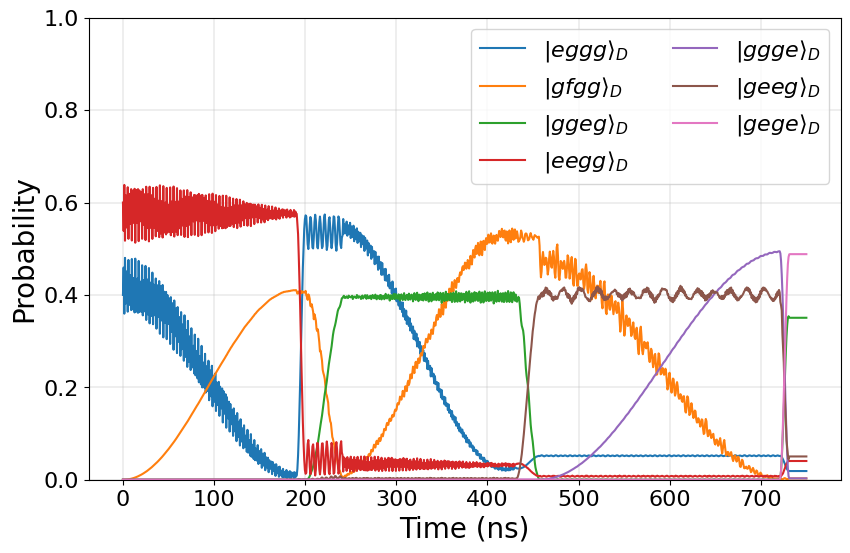

In [124]:
# states for 1 input
eggg = qram.state('eggg')
gfgg = qram.state('gfgg')
ggeg = qram.state('ggeg')
eegg = qram.state('eegg')
ggge = qram.state('ggge')
geeg = qram.state('geeg')
gege = qram.state('gege')
prob_eggg = [np.abs(eggg.overlap(result[t]))**2 for t in range(len(times))]
prob_gfgg = [np.abs(gfgg.overlap(result[t]))**2 for t in range(len(times))]
prob_ggeg = [np.abs(ggeg.overlap(result[t]))**2 for t in range(len(times))]
prob_eegg = [np.abs(eegg.overlap(result[t]))**2 for t in range(len(times))]
prob_ggge = [np.abs(ggge.overlap(result[t]))**2 for t in range(len(times))]
prob_geeg = [np.abs(geeg.overlap(result[t]))**2 for t in range(len(times))]
prob_gege = [np.abs(gege.overlap(result[t]))**2 for t in range(len(times))]

# states for 0 input
gggg = qram.state('gggg')
gegg = qram.state('gegg')
prob_gggg = [np.abs(gggg.overlap(result[t]))**2 for t in range(len(times))]
prob_gegg = [np.abs(gegg.overlap(result[t]))**2 for t in range(len(times))]


plt.plot(times, prob_eggg, label=r'$|eggg\rangle_D$')
plt.plot(times, prob_gfgg, label=r'$|gfgg\rangle_D$')
plt.plot(times, prob_ggeg, label=r'$|ggeg\rangle_D$')
plt.plot(times, prob_eegg, label=r'$|eegg\rangle_D$')
plt.plot(times, prob_ggge, label=r'$|ggge\rangle_D$')
plt.plot(times, prob_geeg, label=r'$|geeg\rangle_D$')
plt.plot(times, prob_gege, label=r'$|gege\rangle_D$')

# plt.plot(times, prob_gggg, label=r'$|gggg\rangle_D$')
# plt.plot(times, prob_gegg, label=r'$|gegg\rangle_D$')

# plt.plot(times, [np.abs(state('geeg').overlap(result[t]))**2 for t in range(len(times))], 'k--', label=r'$|geeg\rangle_D$')
# plt.plot(times, [np.abs(state('efgg').overlap(result[t]))**2 for t in range(len(times))], 'k-.', label=r'$|efgg\rangle_D$')

# for i1 in range(cutoffs[0]):
#     for i2 in range(cutoffs[1]):
#         for i3 in range(cutoffs[2]):
#             for i4 in range(cutoffs[3]):
#                 # print(qram.levels_nums_to_name([i1, i2, i3, i4]))
#                 plt.plot(times, 
#                          [np.abs(qram.state([i1, i2, i3, i4]).overlap(result[t]))**2 for t in range(len(times))],
#                          label='qram.level_nums_to_name[i1, i2, i3, i4]')

# plt.plot(times, [0.5]*len(times), 'k--', linewidth=0.5)
plt.legend(fontsize=16, ncol=2)
plt.ylim(0, 1)
# plt.xlim(750, 1000)
plt.tick_params(labelsize=16)
plt.xlabel('Time (ns)', fontsize=20)
plt.ylabel('Probability', fontsize=20)
# plt.title(r'$\psi_0=|$'+psi0_name+r'$\rangle$')
# plt.title('QRAM state evolution in memory access operation')
plt.grid(linewidth=0.3)
plt.show()

In [87]:
T = 10000 # ns

sum_psi = 0
T = np.argmin(np.abs(times-T))
probs = dict()
print("Non-zero levels:")
for i1 in range(cutoffs[0]):
    for i2 in range(cutoffs[1]):
        for i3 in range(cutoffs[2]):
            for i4 in range(cutoffs[3]):
                prob = np.abs(qram.state([i1, i2, i3, i4]).overlap(result[T]))**2
                sum_psi += prob
                if prob > 0.01:
                    probs.update({qram.level_nums_to_name([i1, i2, i3, i4]):prob})
probs = sorted(probs.items(), key=lambda item:-item[1])
for level, prob in probs:
    print(level, prob)
print('Sum probabilities:', sum_psi)

Non-zero levels:
gege 0.4763865476977751
ggeg 0.29320923668330195
gegg 0.0738552205185828
eegg 0.04762103018107229
eggg 0.02367645107569897
egeg 0.020802360825721105
geeg 0.019984561363088918
gfeg 0.01235285354640816
Sum probabilities: 1.0000000000000009


In [30]:
print('want', qram.get_wd('eegg', 'eggg', 0.05)/2/np.pi)
print('want', qram.get_wd('ggeg', 'geeg', 0.05)/2/np.pi)
print('want', qram.get_wd('ggge', 'gege', 0.05)/2/np.pi)
# print('resonant to', qram.get_wd('ggeg', 'geeg', 0.05)/2/np.pi)
# print('2 photon transition to', qram.get_base_wd('eggg', 'efgg')/2/np.pi)

	new overlap 0.9961589631795436 wd 45.02448850085005
updated wd from 7.165869905094485 to 7.165869905094485
want 7.165869905094485
	new overlap 0.9957843075634043 wd 45.06101860495325
updated wd from 7.171683851734171 to 7.171683851734171
want 7.171683851734171
	new overlap 0.9941425200895379 wd 45.021188893657396
updated wd from 7.165344756299514 to 7.165344756299514
want 7.165344756299514
